In [6]:
#importing all the required libraries for CNN
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
import warnings 
warnings.filterwarnings('ignore')


In [7]:
#Image Data Preprocessing and scaling down to the range of 0-1.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
#Importing the training data set from the directory                                               class_mode = 'binary')

training_set = train_datagen.flow_from_directory(batch_size=32,
                                                           directory=r"C:\MLCourse\cell_images\train",
                                                    
                                                           target_size = (64, 64),
                                                           class_mode='binary')

Found 22046 images belonging to 2 classes.


In [9]:
#Importing the testing data set from the directory
testing_set = test_datagen.flow_from_directory(r'C:\MLCourse\cell_images\valid',
                                                target_size = (64, 64),
                                                batch_size = 32,
                                                class_mode = 'binary')

Found 5512 images belonging to 2 classes.


In [10]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

# Adding a third convolutional layer
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))


# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)      

In [12]:
#Fitting the given model


history = classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 1,
                         validation_data = testing_set,
                         validation_steps = 2000)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
8000/8000 [==============================] - 2118s 265ms/step - loss: 0.2692 - accuracy: 0.8761 - val_loss: 0.1417 - val_accuracy: 0.9482


Infected **


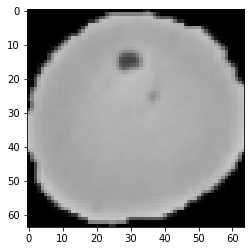

In [48]:
import matplotlib.pyplot as plt
test_image1 = tensorflow.keras.preprocessing.image.load_img(
    r'C:\MLCourse\cell_images\random5.png', grayscale=False, color_mode="rgb", target_size=(64,64),
    interpolation='bilinear'
)
test_image =tensorflow.keras.preprocessing.image.img_to_array(
    test_image1, data_format='channels_last', dtype=None
 )
test_image = np.expand_dims(test_image, axis=0)
test_image.shape

result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]>= 0.5:
    prediction= 'Not infected'
else:
    prediction = 'Infected **'

print(prediction)
plt.imshow(test_image1)


Infected **


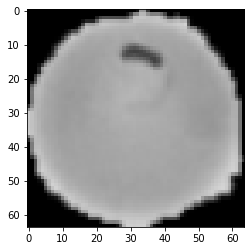

In [49]:
import matplotlib.pyplot as plt
test_image1 = tensorflow.keras.preprocessing.image.load_img(
    r'C:\MLCourse\cell_images\random2.png', grayscale=False, color_mode="rgb", target_size=(64,64),
    interpolation='bilinear'
)
test_image =tensorflow.keras.preprocessing.image.img_to_array(
    test_image1, data_format='channels_last', dtype=None
 )
test_image = np.expand_dims(test_image, axis=0)
test_image.shape

result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]>= 0.5:
    prediction= 'Not infected'
else:
    prediction = 'Infected **'

print(prediction)
plt.imshow(test_image1)

Not infected


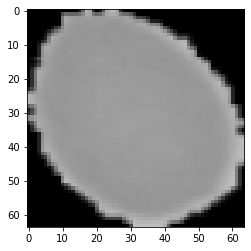

In [50]:
import matplotlib.pyplot as plt
test_image1 = tensorflow.keras.preprocessing.image.load_img(
    r'C:\MLCourse\cell_images\random1.png', grayscale=False, color_mode="rgb", target_size=(64,64),
    interpolation='bilinear'
)
test_image =tensorflow.keras.preprocessing.image.img_to_array(
    test_image1, data_format='channels_last', dtype=None
 )
test_image = np.expand_dims(test_image, axis=0)
test_image.shape

result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]>= 0.5:
    prediction= 'Not infected'
else:
    prediction = 'Infected **'

print(prediction)
plt.imshow(test_image1)

Not infected


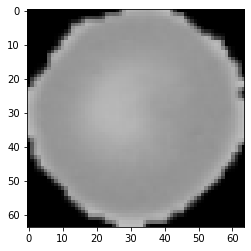

In [51]:
import matplotlib.pyplot as plt
test_image1 = tensorflow.keras.preprocessing.image.load_img(
    r'C:\MLCourse\cell_images\random3.png', grayscale=False, color_mode="rgb", target_size=(64,64),
    interpolation='bilinear'
)
test_image =tensorflow.keras.preprocessing.image.img_to_array(
    test_image1, data_format='channels_last', dtype=None
 )
test_image = np.expand_dims(test_image, axis=0)
test_image.shape

result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]>= 0.5:
    prediction= 'Not infected'
else:
    prediction = 'Infected **'

print(prediction)
plt.imshow(test_image1)

Infected **


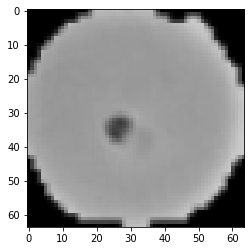

In [52]:
import matplotlib.pyplot as plt
test_image1 = tensorflow.keras.preprocessing.image.load_img(
    r'C:\MLCourse\cell_images\random4.png', grayscale=False, color_mode="rgb", target_size=(64,64),
    interpolation='bilinear'
)
test_image =tensorflow.keras.preprocessing.image.img_to_array(
    test_image1, data_format='channels_last', dtype=None
 )
test_image = np.expand_dims(test_image, axis=0)
test_image.shape

result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]>= 0.5:
    prediction= 'Not infected'
else:
    prediction = 'Infected **'

print(prediction)
plt.imshow(test_image1)

In [53]:
#Thanks for watching